Decision Tree Practice

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df= pd.read_csv("Downloads/synthetic_customer_churn_dataset.csv")

In [7]:
df.shape

(650, 14)

In [8]:
df.head()
# Churn is yes for 1

,CustomerID,Age,Gender,Location,SubscriptionDurationMonths,MonthlyCharges,ContractType,PaymentMethod,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,TotalCharges,Churn
0,CUST-0001,47,Female,Chicago,36,92.36,Month-to-month,Mailed check,No,Yes,Yes,Yes,3345.61,0
1,CUST-0002,67,Female,Phoenix,47,29.28,Month-to-month,Credit card (automatic),Yes,Yes,No,No internet service,1441.35,0
2,CUST-0003,41,Female,Los Angeles,16,116.36,Month-to-month,Bank transfer (automatic),No internet service,Yes,Yes,No internet service,1913.59,1
3,CUST-0004,26,Male,Los Angeles,54,115.28,Month-to-month,Credit card (automatic),No,No,Yes,No,6230.24,1
4,CUST-0005,71,Female,Chicago,37,103.27,One year,Electronic check,No internet service,Yes,Yes,Yes,3874.93,0


In [72]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  650 non-null    object 
 1   Age                         650 non-null    int64  
 2   Gender                      650 non-null    object 
 3   Location                    650 non-null    object 
 4   SubscriptionDurationMonths  650 non-null    int64  
 5   MonthlyCharges              650 non-null    float64
 6   ContractType                650 non-null    object 
 7   PaymentMethod               650 non-null    object 
 8   OnlineSecurity              650 non-null    object 
 9   TechSupport                 650 non-null    object 
 10  StreamingTV                 650 non-null    object 
 11  StreamingMovies             650 non-null    object 
 12  TotalCharges                650 non-null    float64
 13  Churn                       650 non

,Age,SubscriptionDurationMonths,MonthlyCharges,TotalCharges,Churn
count,650.000000,650.000000,650.000000,650.000000,650.000000
mean,48.658462,36.789231,71.304662,2613.371092,0.176923
std,17.825043,21.104777,28.752240,1939.551837,0.381897
min,18.000000,1.000000,20.090000,65.160000,0.000000
25%,33.000000,18.000000,45.835000,1074.520000,0.000000
50%,49.000000,37.000000,73.390000,2147.195000,0.000000
75%,64.000000,55.000000,95.580000,3999.745000,0.000000
max,79.000000,72.000000,119.850000,8347.140000,1.000000


In [13]:
df.isnull().sum()
# no missing values in the data set
df.duplicated().sum()

np.int64(0)

In [15]:
X= df.drop(['Churn'], axis=1)
y= df['Churn']

In [19]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape

((455, 13), (195, 13))

In [20]:
# Feature Engineering- transforming raw data into useful features

X_train.dtypes

CustomerID                     object
Age                             int64
Gender                         object
Location                       object
SubscriptionDurationMonths      int64
MonthlyCharges                float64
ContractType                   object
PaymentMethod                  object
OnlineSecurity                 object
TechSupport                    object
StreamingTV                    object
StreamingMovies                object
TotalCharges                  float64
dtype: object

In [27]:

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=[
    'Gender', 
    'Location',
    'ContractType',
    'PaymentMethod',
    'OnlineSecurity',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
])


In [41]:
X_train = X_train.drop("CustomerID", axis=1)
X_train = encoder.fit_transform(X_train)

X_test = X_test.drop("CustomerID", axis=1)
X_test = encoder.transform(X_test)




In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz 

In [34]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [99]:
# Decision Tree Using Entropy as a Criteria

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

clf_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [100]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_train_en = clf_en.predict(X_train)

In [92]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


In [101]:
# Checking the accuracy score

Accuracy_scores= pd.DataFrame([[accuracy_score(y_test,y_pred_en), accuracy_score(y_train, y_pred_train_en)]],
                            columns=["Testing accuracy", "Training accuracy"]
)
Accuracy_scores

,Testing accuracy,Training accuracy
0,0.774359,0.824176


[Text(0.5416666666666666, 0.875, 'x[3] <= 19.5\nentropy = 0.676\nsamples = 455\nvalue = [374, 81]'),
 Text(0.3333333333333333, 0.625, 'x[11] <= 277.23\nentropy = 0.837\nsamples = 120\nvalue = [88, 32]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[4] <= 81.03\nentropy = 0.337\nsamples = 32\nvalue = [30, 2]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.25, 0.125, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.5, 0.375, 'x[9] <= 2.5\nentropy = 0.926\nsamples = 88\nvalue = [58.0, 30.0]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.818\nsamples = 59\nvalue = [44, 15]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.999\nsamples = 29\nvalue = [14.0, 15.0]'),
 Text(0.75, 0.625, 'x[11] <= 1093.415\nentropy = 0.6\nsamples = 335\nvalue = [286.0, 49.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.8333333333333334, 0.375,

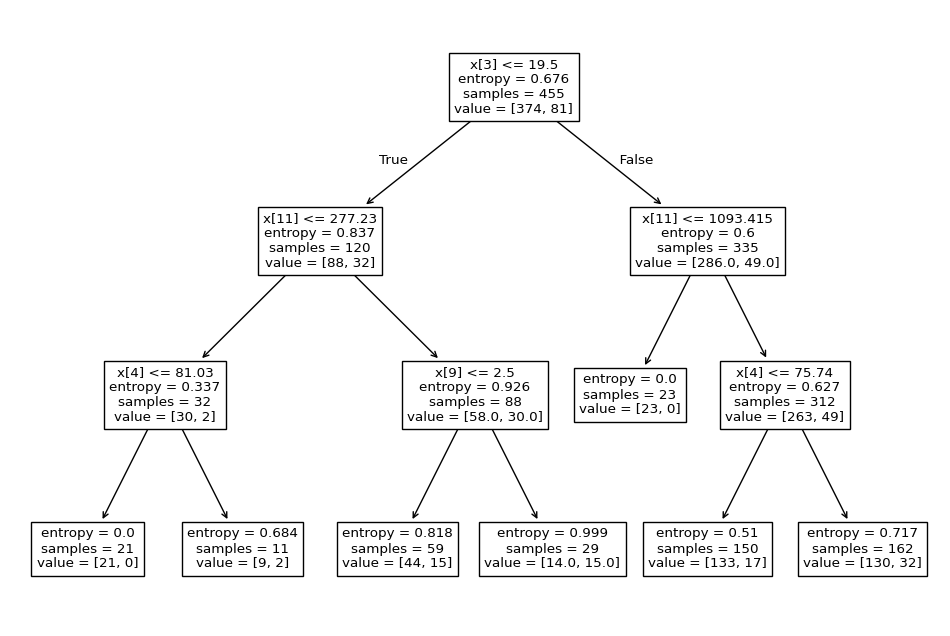

In [102]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[135  26]
 [ 25   9]]


In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en, target_names=["No Churn", "Churn"]))


              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87       161
       Churn       0.29      0.21      0.24        34

    accuracy                           0.77       195
   macro avg       0.57      0.55      0.55       195
weighted avg       0.75      0.77      0.76       195



,Feature,Importance
11,TotalCharges,0.158885
0,Age,0.158580
2,Location,0.111906
3,SubscriptionDurationMonths,0.105748
6,PaymentMethod,0.105388
4,MonthlyCharges,0.091092
8,TechSupport,0.086029
5,ContractType,0.063027
9,StreamingTV,0.048785
1,Gender,0.041783


/var/folders/09/89r30_ms6xdcd7znk61plqgr0000gn/T/ipykernel_99083/3361825401.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


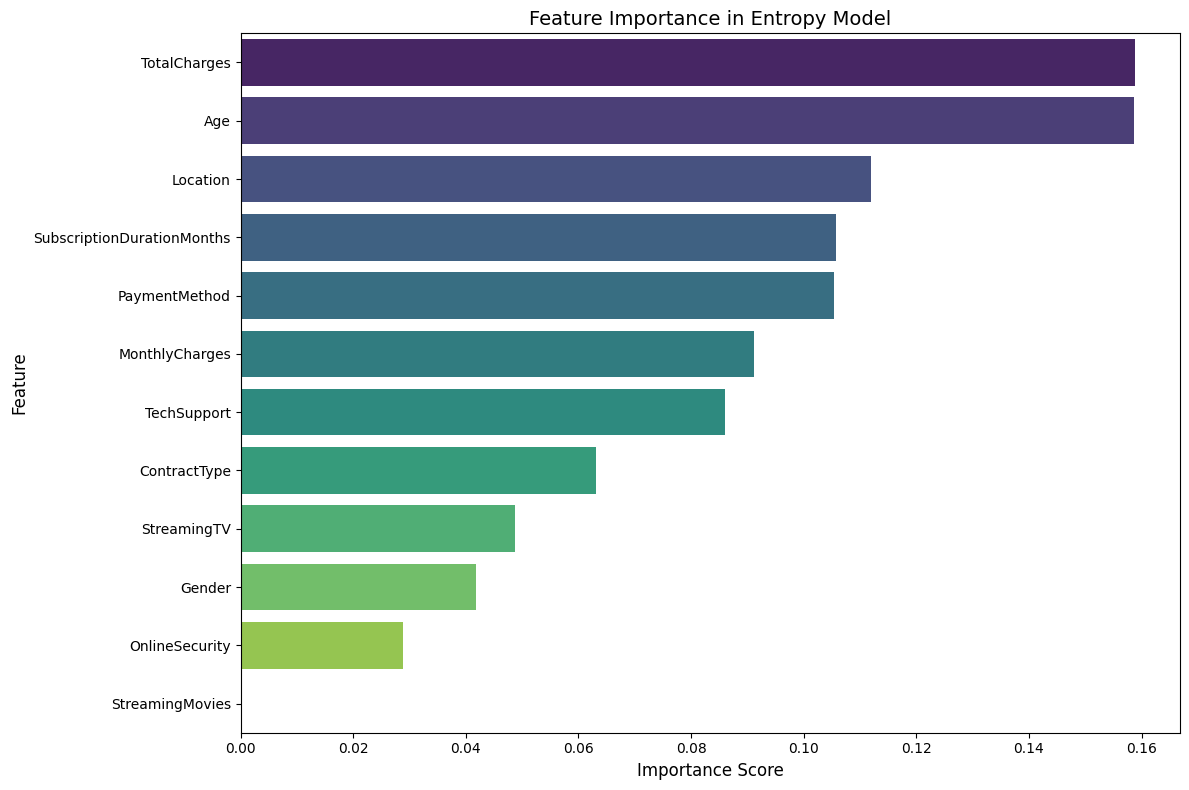

In [104]:
feature_importance = clf_entropy.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

display(importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in Entropy Model", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [88]:
# Using a Random Forest Model

# Using a Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Then get feature importances
feature_importance = rf.feature_importances_
